In [682]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [683]:
pd.set_option('display.max_columns', 90)
pd.set_option('display.max_rows', 90)

In [684]:
training_data = pd.read_csv('house-prices-advanced-regression-techniques\\train.csv', index_col='Id')

In [685]:
testing_data = pd.read_csv('house-prices-advanced-regression-techniques\\test.csv', index_col='Id')

In [686]:
df = pd.concat([training_data, testing_data])

In [687]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN


In [688]:
# basing on data desription, change numerical values to string
df = df.astype({'MSSubClass': object, 'OverallCond': object, 'OverallQual': object})
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN


In [689]:
# find cols with many (>=50%) missing values
nan_prct_mask = df.isnull().sum() > df.shape[0] / 2
cols_to_drop = nan_prct_mask[nan_prct_mask].keys()
df = df.drop(cols_to_drop, axis='columns')
cols_to_drop

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [690]:
# get numerical variables
keys = [key for key, column in df.items() if column.dtype in ['int64', 'float64']] #  all numerical
keys

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [691]:
# square feet of floors can be aggregated 
FlrSF = pd.Series(df[['1stFlrSF', '2ndFlrSF']].sum(axis=1))
df['FlrSF'] = FlrSF
# square feet of basement is enough, drop fields related to basement size, fillna with 0
df['TotalBsmtSF'].fillna(0 ,inplace=True)
# # aggregate bathrooms and half-bathrooms for floors and basements
FullBath = pd.Series(df[['BsmtFullBath', 'FullBath']].sum(axis=1))
Halfbath = pd.Series(df[['BsmtHalfBath', 'HalfBath']].sum(axis=1))
df['FullBathroom'] = FullBath
df['HalfBathroom'] = Halfbath

cols_to_drop = ['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'BsmtFullBath', 'FullBath','BsmtHalfBath', 'HalfBath']

for col in cols_to_drop:
    df.drop(col, axis=1, inplace=True)

keys = [key for key, column in df.items() if column.dtype in ['int64', 'float64']] #  all numerical
keys

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'FlrSF',
 'FullBathroom',
 'HalfBathroom']

With Frontage:180770.48043297252
Without Frontage:181620.07335907337


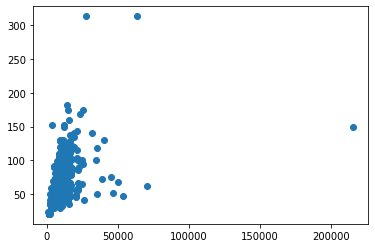

In [692]:
# lot analysis, any correlaction?
lot = training_data[['SalePrice','LotFrontage','LotArea']]
print('With Frontage:' + str(training_data[lot['LotFrontage'].notnull()].SalePrice.mean()))
print('Without Frontage:' + str(training_data[lot['LotFrontage'].isnull()].SalePrice.mean()))
# knownig frontage doesn't seem as importatnt feature in terms of proce
# frontage is correnalted to Area
plt.scatter(lot['LotArea'], lot['LotFrontage'])
# dropping frontage
df.drop('LotFrontage', axis=1, inplace=True)

In [693]:
# Changing types
# df.Fireplaces = df.Fireplaces.astype(bool).astype(int)
# df.SalePrice = df.SalePrice.astype(float)

floats = [
'LotArea',
'MasVnrArea',
'TotalBsmtSF',
'LowQualFinSF',
'GrLivArea',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'SalePrice',
'FlrSF',
'MiscVal'
]

ints = [
'YearBuilt',
'YearRemodAdd',
'BedroomAbvGr',
'KitchenAbvGr',
'TotRmsAbvGrd',
'Fireplaces',
'GarageYrBlt',
'MoSold',
'YrSold',
'FullBathroom',
'HalfBathroom'
]



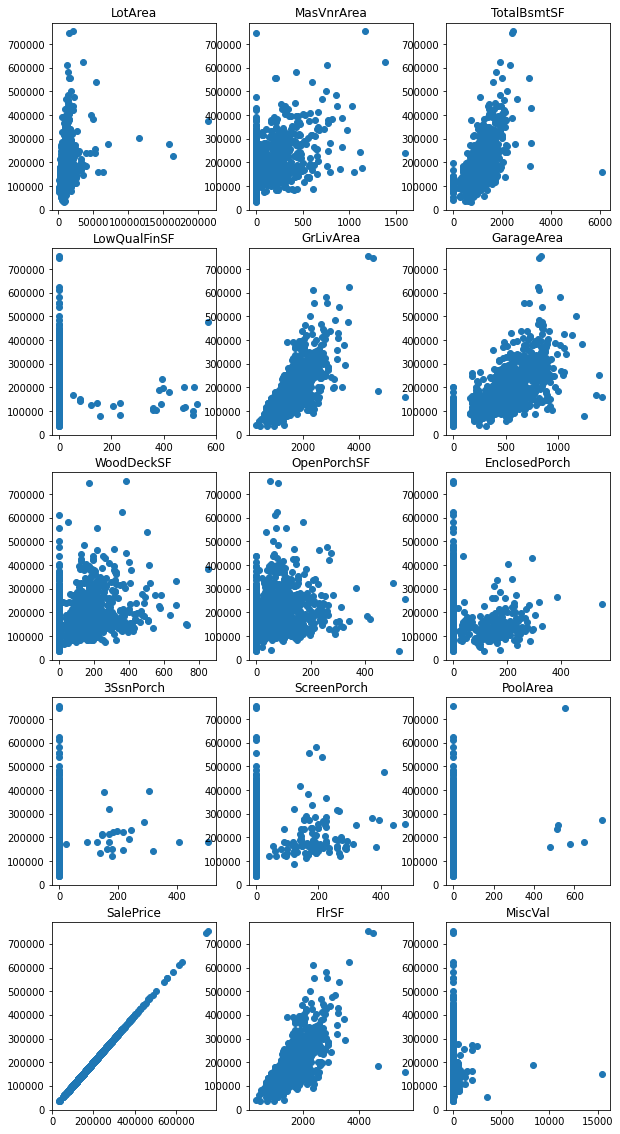

In [694]:
# scatter analysis
plt.subplots(5, 3, figsize=(10, 20)) 
for idx, key in enumerate(floats, 1):
    plt.subplot(5, 3, idx, title=key)
    plt.scatter(df[key], df['SalePrice'])

In [695]:
# scatter analysis outcome:
to_drop = ['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'GarageCars']
for _ in to_drop:
    df.drop(_, axis=1, inplace=True)
# PoolArea - will be changed to bool
df.PoolArea = df.PoolArea.astype(bool).astype(int)


In [696]:
df.shape

(2919, 64)

In [697]:
nan_prct_mask = df.isnull().sum() > 1
cols_to_drop = nan_prct_mask[nan_prct_mask].keys()
cols_to_drop = [col for col in cols_to_drop if col != 'SalePrice']
df[cols_to_drop].isnull().sum()

MSZoning           4
Utilities          2
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
dtype: int64

In [698]:
# fixing missing vals
df.drop('FireplaceQu', axis=1, inplace=True)
df.drop('Utilities', axis=1, inplace=True)
df.drop('GarageYrBlt', axis=1, inplace=True)

df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['BsmtQual'] = df['BsmtQual'].fillna("NB")
df['BsmtCond'] = df['BsmtCond'].fillna("NB")
df['BsmtExposure'] = df['BsmtExposure'].fillna("NB")
df['BsmtFinType1'] = df['BsmtFinType1'].fillna("NB")
df['BsmtFinType2'] = df['BsmtFinType2'].fillna("NB")
df['Functional'] = df['Functional'].fillna("Typ") 
df['GarageType'] = df['GarageType'].fillna("NG") 
df['GarageFinish'] = df['GarageFinish'].fillna("NG") 
df['GarageQual'] = df['GarageQual'].fillna("NG")
df['GarageCond'] = df['GarageCond'].fillna("NG")
df['GarageArea'] = df['GarageArea'].fillna(0)

In [699]:
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,FlrSF,FullBathroom,HalfBathroom
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856.0,GasA,Ex,Y,SBrkr,1710,3,1,Gd,8,Typ,0,Attchd,RFn,548.0,TA,TA,Y,0,61,0,0,2,2008,WD,Normal,208500.0,1710,3.0,1.0
2,20,RL,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262.0,GasA,Ex,Y,SBrkr,1262,3,1,TA,6,Typ,1,Attchd,RFn,460.0,TA,TA,Y,298,0,0,0,5,2007,WD,Normal,181500.0,1262,2.0,1.0
3,60,RL,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920.0,GasA,Ex,Y,SBrkr,1786,3,1,Gd,6,Typ,1,Attchd,RFn,608.0,TA,TA,Y,0,42,0,0,9,2008,WD,Normal,223500.0,1786,3.0,1.0
4,70,RL,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756.0,GasA,Gd,Y,SBrkr,1717,3,1,Gd,7,Typ,1,Detchd,Unf,642.0,TA,TA,Y,0,35,0,0,2,2006,WD,Abnorml,140000.0,1717,2.0,0.0
5,60,RL,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145.0,GasA,Ex,Y,SBrkr,2198,4,1,Gd,9,Typ,1,Attchd,RFn,836.0,TA,TA,Y,192,84,0,0,12,2008,WD,Normal,250000.0,2198,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,Unf,546.0,GasA,Gd,Y,SBrkr,1092,3,1,TA,5,Typ,0,NG,NG,0.0,NG,NG,Y,0,0,0,0,6,2006,WD,Normal,NaN,1092,1.0,1.0
2916,160,RM,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,Unf,546.0,GasA,TA,Y,SBrkr,1092,3,1,TA,6,Typ,0,CarPort,Unf,286.0,TA,TA,Y,0,24,0,0,4,2006,WD,Abnorml,NaN,1092,1.0,1.0
2917,20,RL,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,Unf,1224.0,GasA,Ex,Y,SBrkr,1224,4,1,TA,7,Typ,1,Detchd,Unf,576.0,TA,TA,Y,474,0,0,0,9,2006,WD,Abnorml,NaN,1224,2.0,0.0


In [700]:
# Model Bulding
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

df = pd.get_dummies(df)
df_train = df.iloc[:1460, :]
df_train.SalePrice = df_train.SalePrice.astype(int)
df_test = df.iloc[1460:, :]
df_test.drop(['SalePrice'], axis=1, inplace=True)


c:\Users\dariu\Desktop\labs\venv\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
C:\Users\dariu\AppData\Local\Temp\ipykernel_41648\3456312649.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.SalePrice = df_train.SalePrice.astype(int)
C:\Users\dariu\AppData\Local\Temp\ipykernel_41648\3456312649.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['SalePrice'], axis

In [701]:
# Building a model
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier 

X = df_train.drop(['SalePrice'], axis=1)
y = df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) 

In [702]:
# lr = LinearRegression().fit(X_train, y_train)
# print("Wynik dla zestawu uczącego: {:.2f}".format(lr.score(X_train, y_train))) 
# print("Wynik dla zestawu testowego: {:.2f}".format(lr.score(X_test, y_test)))  

In [703]:
# lasso = Lasso(max_iter=10000).fit(X_train, y_train) 
# print("Wynik dla zestawu uczącego: {:.2f}".format(lasso.score(X_train, y_train))) 
# print("Wynik dla zestawu testowego: {:.2f}".format(lasso.score(X_test, y_test))) 
# print("Liczba użytych cech: {}".format(np.sum(lasso.coef_ != 0))) 

In [716]:
ridge = Ridge(alpha=10).fit(X_train, y_train) 
print("Score for training set: {:.2f}".format(ridge.score(X_train, y_train))) 
print("Score for testing set: {:.2f}".format(ridge.score(X_test, y_test))) 

Wynik dla zestawu uczącego: 0.90
Wynik dla zestawu testowego: 0.87


In [705]:
# from sklearn.ensemble import RandomForestClassifier 
# X_train, X_test, y_train, y_test = train_test_split( 
# X, y, random_state=0) 
# forest = RandomForestClassifier(n_estimators=256, random_state=0) 
# forest.fit(X_train, y_train) 
# print("Dokładność w danych uczących: {:.3f}".format(forest.score(X_train, y_train))) 
# print("Dokładność w danych testowych: {:.3f}".format(forest.score(X_test, y_test))) 

In [ ]:
prediction = ridge.predict(df_test)
pred=pd.DataFrame(prediction)
sub_df = pd.read_csv('house-prices-advanced-regression-techniques\\sample_submission.csv')
dataset = pd.concat([sub_df['Id'], pred], axis='columns')
dataset.columns = ['Id', 'SalePrice']

dataset.to_csv('house-prices-advanced-regression-techniques\\sample_submission.csv', index=False)
